# Understanding the data

The _MNIST_ database (short for **M**odified **N**ational **I**nstitute of **S**tandards and **T**echnology database) is a large
database of handwritten digits that is commonly used for training various image processing systems.The database is also widely used for training and testing in the field of machine learning.

The _MNIST_ database is already included in tensorflow installation, along with keras. We need a package called `mnist` to load the _MNIST_ data to our local machine. `mnist` package is imported as follows. If you have GPU in your machine and not using it, you might need to run the first two lines.


In [1]:
# This avoids any warning for not using GPU
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 

# import tensorflow and mnist package
from tensorflow.keras.datasets import mnist

We can then load mnist dataset using the package's function `load_data()`.

In [2]:
(train_images, train_labels),(test_images, test_labels) = mnist.load_data()

We have four datasets:
1) Training images and their corresponding labels, and
2) Test images with their corresponding labels. 

Both train and test images are stored in a _numpy_ format. If you want to have an idea of of what the training images look like, use `shape` attribute of numpy. The output comes with `(60000, 28, 28)` as shown below. This means the data has sixty thausand samples (or data points/examples) of different digit categories (or classes) with a shape (28, 28).

These images are black and white square images with 28 pixels height and 28 pixels width.

In [3]:
train_images.shape

(60000, 28, 28)

The number of examples can also be known with the standard Python `len` function.

In [4]:
len(train_images)

60000

For each of the example images, there is a corresponding label. The _MNIST_ training labels are a list of 60,000 numbers (corresponding to the number of images) ranging from 0-9. You can see this list like so.

In [5]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

The length of the this list is computed similarly by using the `len` function.

In [6]:
len(train_labels)

60000

Once we have the nature and the structure of the data, we can build our model. Building the model without looking at your data might give you a headache later when you try to fit your model. So, it is advisable to work on your data first. In real world projects, you might spend quite little bit of time cleaning and restructuring your data. 

In our case, the _MNIST_ data is already clean and is ready for training. Only three items remain to be solved.

1) Reshaping our data so that it will fit to the model we will be building in the next section.
2) Change integer values into floating points

 **1. Change integer values into floating points**

First is reshaping data from a two dimentional to a one-dimentional datasets. The following code snippet converts the two dimensional image `(28, 28)` to a one-dimensional image of length `(28*28)`.

In [7]:
train_images = train_images.reshape((60000, 28 * 28))

Now you can see that each of the training images is a one-dimentional image with 784 features, rather than a two-dimensional image with 28 features each, as can be seen from the below code block.

In [8]:
train_images.shape

(60000, 784)

 
 **2. Reshaping our data so that it will fit to the model we will be building in the next section**

The second item is changing integers to floating points.This is because, as they are, we have integer values ranging from 0-255 for each pixel in these images. We need to change this format into floating numbers through a division by 255.

In [9]:
train_images = train_images.astype("float32") / 255

In [10]:
len(train_labels)

60000

We are done with working with the training data. The test data has a similar structure and you can use the same thing as above. The only difference is in the number of examples. While we have 60,000 training images, we have only 10,000 images. We will come back to this later while we test our trained mode.

# Building the model

To build the model, we first import `keras` and `layers` from `tensorflow`.

In [11]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

The first step in buidling our network is to determine number of parameters (that which change during training) and type/number of hyperparameters (that which we do not change during training; but change in between training). In our case, we are going to build a small model with two layers (including the output layer, but excluding the input layer). 

The first input will have 510 cells while the output layer has 10 cells (as it should be because we have only ten classes of digits: 0-9). The input layer is not counted as layer because it is the example itself. In our case, we have 784 cells (i.e. 28*28).

We set two hyperparameters. In the first layer, the activation layer is `relu` (i.e. rectified linear unit) while the activation layer for the output layer is a `softmax`.

Our model is named as digit_recognizer and is built as follows:

In [12]:
digit_recognizer = keras.Sequential([
    layers.Dense(510, activation='relu'),
    layers.Dense(10, activation='softmax')
])

From now on, we will be working with `digit_recognizer` which holds all the parameters and hyperparameters of the model; will supply us important functions which we will be using in the next sections.

# Model compilation

In order to make the above model ready for training, we need to make some configurations on the model. At this stage, there are three important hyperparameters to consider for the configuration. 

The model should have a mechanism to learn (i.e. through which the model will update itself) based on the training data it sees, so as to improve its performance. This is handled by the `optimizer` hyperparameter. There are several optimzers out there with different ways of handling this updating (learning) process based on the specific problem at hand. We use `rmsprop` in this project.

The output (probabilities from the final layer) of the model should be compared with the ground truth. This comparizon is made based on a standard `loss` function. While you will have several of these loss functions available depending on the problem at hand, we will use `sparse_categorical_crossentropy` for this project.

Finally, progress in the learning process should be recorded so that the necessary intervention is made by the data scientist by changing hyperparameters.The `metric` argument serves this purpose.  Computing accuracy can be enough for this exampple. So, we use `accuracy`.

To make these comfigurations (or compile our model), we use the `compile()` function of the our model.

In [13]:
digit_recognizer.compile(
    optimizer = tf.keras.optimizers.legacy.Adam(),
    loss = 'sparse_categorical_crossentropy',
    metrics= ['accuracy']
)

# Fitting model

Fitting a model is a fancy word for `training` the model. We use the `fit()` function of the model that was already compiled in the above section. We will give the training images and training labels to this function. Furthermore, we still need to set some additional hyperparameters for this function. The first is the number of `epochs`. An epoch is when all the training data is used at once and is defined as the total number of iterations of all the training data in one cycle for training the model. We set 50 in our example. That is, we need the training to go five times (all the data should pass throught the model 5 times).

The second hyperparameter is the `batch_size` which is number of samples processed before the model is updated. We set 128 in this example. This means that once the first 128 example training images are processed, the model is updated. The second update is made only after the next 128 examples (i.e. at the 256th etc.) 

The third hyperparameter is `validation_data` which is the proporation of the validation data set.A validation data set is used in deep learning (and in supervised machine learning in general) to compare the performance of different trained models. This enables us to choose the correct model or hyper-parameters within the model.

Finally, because this is the training stage, there are some temporary variables/values generated such as losses and metrics that we defined above in the model compilation stage. We need to capture them to monitor the training processes. We will capture them in the `hist` object that preceeds the model.

To save space here, outputs are omitted; if you run this on your local machine, you will see some lengthy output. The training might take a couple of minutes under normal circumstances. Depending on your computing power of your local machine, it might take longer. 

In [14]:
hist = digit_recognizer.fit(train_images,
                      train_labels,
                      epochs=50,
                      batch_size=128,
                      validation_split=0.25, 
                      verbose=0)  

# Model validation

Model validation is the task of evaluating whether a chosen model is appropriate or not. We have some variables, created during training, that would help us check this appropriateness of the model. Two of the most important ones are the loss and accuracy of the training and validation data generated during the training process. 

We can have access to these values from the hist object that we caputred when we run the `digit_recognizer.fit()` function in the above step.

Now, let's get a dictionary of these values and print the keys. You can also find the values using `history_dict.values()`.

In [15]:
history_dict = hist.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

`loss` and `accuracy` are the loss and accuracy values respectively from the training data. Similarly, `val_loss` and `val_accuracy` are the loss and accuracy of the validation data set based on the trained model.

Now, lets get the actual values from this dictionary object. 

In [16]:
loss = history_dict["loss"]
acc = history_dict["accuracy"]

valid_loss = history_dict["val_loss"]
valid_acc = history_dict["val_accuracy"]

We can then draw these values on a two dimentional plot so that we can see what the loss and accuracy of how the training and validation data sets predict the labels. On the y-axis are the loss and accuracy values while the x-axis is the number of epochs.

The first graph below shows the level of training loss and validation loss (i.e. y-axis) over the epochs (i.e. x-axis).  We need to create an epoch variable for this, like so. The epochs variable has sequential numbers ranging from 1 to 51 (excluded).

In [17]:
epochs = range(1, len(loss) + 1)
print(epochs)

range(1, 51)


Next, we need to importy matplotlib graphing libarary, and use the `plt.plot()` funciton to draw the graph. Following the import of `matplotlib`, we determine the ideal size of the graph.

In [18]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [6, 6]

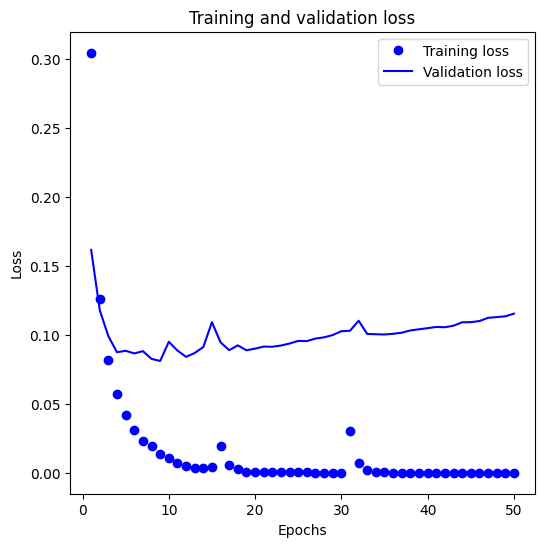

In [19]:
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, valid_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In a similar fassion, we can draw the accuracy of the training and validation data sets in the y-axis and epochs in the x-asis as shown below.

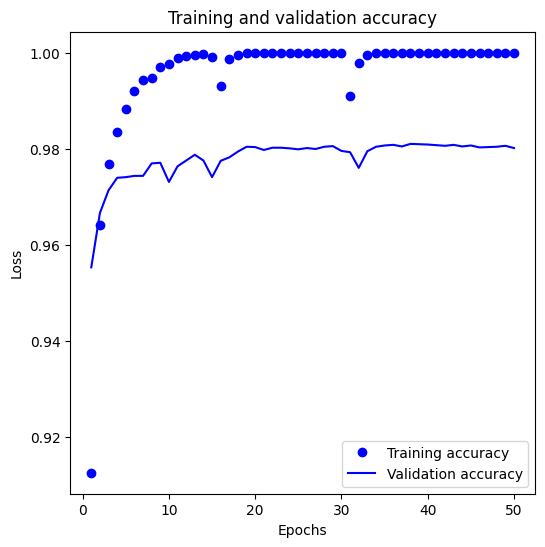

In [20]:
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, valid_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

Looking at these graphs, we can have some adjustments based on the shape of the graphs and gap between the two lines. There can be either model overfitting/underfitting. We can then make adjustments in either the parameters or hyperparameters of the model to solve these overfitting/underfitting. There are some known techniques for this: increase/decrease model size, modify input features based on insights from error analysis, reduce or eliminate regularization, modify model architecture or add more training data. I will come to these solutions in a latter project.

Once we make these adjustments guided by the validation data set, we might arrive at the reasonably good performing model. So far, the validation model is used just to make adjustments on the model/data. The actual test of the model is to be seen when the model is embarked on to an unknown data set. We do this in the following section.

# Model evaluation

Before testing the model,let's explore our test data. First, the size and shape of the test data. We use similar functions that we used in the second section. We can run the shape and length of the test images as follows:

In [21]:
test_images.shape, len(test_images)

((10000, 28, 28), 10000)

We have 10,000 test images with shape `(28*28)` pixels. Furthermore, we can also see their labels, which are similar to train_images.

In [22]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

We need to do two things before feeding the test data into our trained model. First, because the model was trained based on the train_images whose shape is `60000, 28*28)`, we need to transform the test data in a similar fashion:

In [23]:
test_images = test_images.reshape((10000, 28 * 28))

Then, we also convert the integers 0-255 into a floating point `float32`.

In [24]:
test_images = test_images.astype("float32") / 255

To predict images based on test images, we use `recognizer.predict()` function. We feed into the model the first 10 test images.

In [25]:
predictions = digit_recognizer.predict(test_images[0:10])

1/1 [==============================] - 0s 76ms/step


Let's see the outputs of the `prediction` object with the first test in the list(remember a python arraw is zero indexed).

In [26]:
predictions[0]

array([2.3140974e-15, 1.4965891e-19, 1.4998084e-13, 7.4675146e-09,
       3.6565441e-26, 7.0664235e-19, 5.7438111e-23, 1.0000000e+00,
       2.6157322e-15, 8.7947410e-12], dtype=float32)

Each number in the array list above corresponds to the probability that digit image the digit belongs to class. The 8th element (i.e. number 7-remember that the array is a zero indexed list) for example is the heighest (9.9999982e-01=0.99999982) among the probabilities of the ten classes. This shows that the first element (i.e. `predictions[0]`) is probably 7. We can see this with the `predictions[0].argmax()` function like so.

In [27]:
predictions[0].argmax()

7

Let's check if this prediciton is correct and is right in predicting the ground truth.

In [28]:
test_labels[0]

7

The model predicts it right! You can also test with other examples. For example, the following code shows (with a little bit of formatting) the prediction and actual values side by side for the sixth predicted element. The predicted digit is 4 and the actual is also four. You can do this for other examples.

In [29]:
print(f'Predicted digit: {predictions[6].argmax()}, Actual digit: {test_labels[6]}')

Predicted digit: 4, Actual digit: 4


Because the accuracy of this model is more than 98 percent. You might not get a wrong prediction. However, this is not always true and the model might not be able to predict every digit perfectly. There might be some digits that are not correctly predicted. 
Checking whether the model is correctly predicting or not based on a signle test image might not be an efficient way of checking the performance of the model. Therefore, we should have an aggregated measure for the performance of the model. For this, we use the evaluate function of the model: `recognizer.evaluate()`. It outputs the overall test using the loss and accuracy measures computed above.

Run the following code to do this. Watch closely that all the test data was given to the `recognizer.evaluate()` function unlike the above tests with only part of the test data. This is because we want to see the overall performance of the model, rather than example by example.

In [30]:
test_loss, test_acc = digit_recognizer.evaluate(test_images, test_labels)

313/313 [==============================] - 0s 1ms/step - loss: 0.0953 - accuracy: 0.9823


Now, you can see the overall performance by printing the `test_acc` object. The output shows a little higher than 98 percent performance, which is good given our simple model.

In [31]:
print(f"Test accuracy: {round(test_acc*100, 1)}%")

Test accuracy: 98.2%


We can see that the performance of the model is 98 percent. This means if the model is given, say, 100 unknown images (similar to the ones used for training the model), then it will probably be predicting right 98 of the time correctly. 